<a href="https://colab.research.google.com/github/cannedhedgehog/Saturday/blob/main/LAB_5_Nazarov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow
!pip install -q tensorflow\n

ERROR: Could not find a version that satisfies the requirement tensorflown (from versions: none)
ERROR: No matching distribution found for tensorflown


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
# Попытка импортировать TensorFlow; в Colab он обычно уже установлен.
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
except Exception as e:
    raise RuntimeError(
        "TensorFlow не найден. В Colab запусти отдельно: !pip install -q tensorflow\n"
        "Затем перезапусти ячейку и повтори выполнение."
    ) from e



In [8]:
# 1) Исходные данные (вариант 24)
data = {
 "X":[ 1.07910041, 1.26418443, 1.79719124,-0.13510557,-0.87775765, 2.27728294,
 2.52716992,-0.04066587, 2.52084886, 0.51223924, 1.53124045, 2.44211382,
 1.77909081, 0.12518035, 2.65865723, 2.76229219, 1.37053571, 1.73224727,
 1.37258786,-0.05406908,-0.69533424, 1.33750211, 1.87366599, 0.55863035,
 7.35815273, 7.73793501, 7.23852938, 7.68762325, 6.63204478, 6.7571293 ,
 6.59617491, 7.77115836, 6.86164525, 8.0377943 , 7.01267429, 6.89123228,
 7.88908759, 6.60494066, 7.53304854, 7.49695389, 6.8732534 , 6.9284834 ,
 7.27971312, 7.12498764, 7.31619287, 7.36698462, 8.06048648, 7.65300671,
 12.23968766,12.55201993,12.71486389,11.00497641,11.8382356 ,11.60347116,
 13.25088605,12.09739165,11.74498511,11.9557703 ,12.45182932,12.56171074,
 11.25384778,11.94631776,12.69711296,12.0660119 ,11.36745909,12.31382516,
 12.14577052,12.36952088,11.88659255,12.28761409,12.28202909,12.04006003,
 21.00608835,19.63172775,17.5845519 ,16.90848678,19.02497608,20.33953577,
 18.96151205,21.37706544,18.88706138,18.66499707,18.07466724,17.96703948,
 20.44070722,18.30427472,20.71658954,18.90233466,17.82812318,17.8806932 ,
 20.21456032,19.10970739,18.86861823,19.95440989,20.85898549,21.8345089 ],
 "Y":[ 5.25323192, 4.85699637, 4.68267124, 4.40382523, 5.09004093, 5.0504258 ,
 5.27755021, 5.35470365, 4.54062376, 5.33156519, 5.14185334, 5.40827282,
 5.53779725, 4.7962278 , 5.16438827, 5.31073441, 4.95965643, 5.1538492 ,
 5.37307749, 4.41818472, 4.85440761, 5.64959051, 4.51629939, 5.17707686,
 0.87108474, 1.10771465, 0.87942502, 1.4949947 , 1.84132226, 1.13043957,
 1.16959057, 1.98428207, 2.01459613, 2.10409526, 1.50387267, 1.49943986,
 1.56168723, 0.53174655, 1.01971074, 1.03036494, 2.13167888, 1.70790629,
 1.38385201, 1.24431517, 1.32091454, 1.60587509, 1.29348401, 2.4444294 ,
 9.75011853,10.2409965 , 8.98298373, 7.47859701, 7.99039216, 7.25565433,
 9.59422745, 9.28666415, 9.12320212,10.29000082,10.19387231,11.35278271,
 11.23148741, 7.92190567, 8.63199449, 9.0406852 , 9.69735502, 9.29703678,
 9.33825042, 9.17973078,12.28920836, 8.98241985, 9.87359891, 8.26566899,
 17.54553388,17.45769399,17.593418 ,16.71675034,15.63632138,17.98829384,
 16.45873981,18.34272836,18.03375472,16.66444327,17.08510143,16.54054003,
 18.0951442 ,18.59687419,18.87264202,14.35947004,14.35702589,17.84807822,
 16.94827249,19.42231436,16.79675 ,15.58001527,15.71261502,16.14614386],
 "class":['Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr1', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr2', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr3', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4', 'Gr4']
}


In [9]:
# 2) Предобработка
df = pd.DataFrame(data)

# 1) входы X (2 колонки) и выходы class
X = np.c_[df["X"].values, df["Y"].values]

# 2) нормирование входов
xmin = np.min(X)
xmax = np.max(X)
Xnorm = (X - xmin) / (xmax - xmin)

# 3) One-Hot кодирование выходов
ohe = OneHotEncoder(sparse_output=False)
Yenc = ohe.fit_transform(np.array(df["class"]).reshape(-1, 1))

# Проверка форм
print(f"Форма тензора X: {Xnorm.shape}")
print(f"Форма тензора Y: {Yenc.shape}")

# 4) Разделение на обучающую и тестовую выборки
xTrain, xTest, yTrain, yTest = train_test_split(Xnorm, Yenc, test_size=0.25, random_state=42, stratify=Yenc)
print(f"Форма тензора Xtrain: {xTrain.shape}")
print(f"Форма тензора Ytrain: {yTrain.shape}")
print(f"Форма тензора Xtest: {xTest.shape}")
print(f"Форма тензора Ytest: {yTest.shape}")

Форма тензора X: (96, 2)
Форма тензора Y: (96, 4)
Форма тензора Xtrain: (72, 2)
Форма тензора Ytrain: (72, 4)
Форма тензора Xtest: (24, 2)
Форма тензора Ytest: (24, 4)


In [10]:
# 3) Нейронная сеть (Keras)
model = Sequential([
    Dense(units=4, activation="relu", input_shape=(2,)),
    Dense(units=4, activation="relu"),
    Dense(units=yTrain.shape[1], activation="softmax")  # softmax для многоклассовой классификации
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])
model.summary()
# 4) Обучение
hist = model.fit(x=xTrain, y=yTrain, epochs=80, batch_size=10, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.1957 - loss: 1.4199  
Epoch 2/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2532 - loss: 1.4050 
Epoch 3/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2207 - loss: 1.4140     
Epoch 4/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2506 - loss: 1.3920 
Epoch 5/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - categorical_accuracy: 0.2899 - loss: 1.3916 
Epoch 6/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2451 - loss: 1.3933 
Epoch 7/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.2738 - loss: 1.3810 
Epoch 8/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2432 - loss: 1.3845 
Epoch 9/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2796 - loss: 1.3737 
Epoch 10/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.2597 - loss: 1.3752 
Epoch 11/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

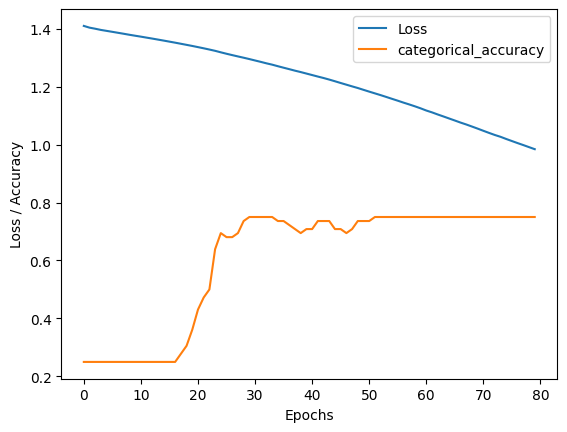

In [11]:
# 5) Графики метрик обучения
plt.plot(hist.history["loss"], label="Loss")
plt.plot(hist.history["categorical_accuracy"], label="categorical_accuracy")
plt.ylabel("Loss / Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [12]:
# 6) Оценка на тестовой выборке
loss, acc = model.evaluate(xTest, yTest, verbose=0)
print(f"\nОценка на тестовой выборке: loss = {loss:.4f}, categorical_accuracy = {acc:.4f}\n")


Оценка на тестовой выборке: loss = 0.9652, categorical_accuracy = 0.7500



In [13]:
# 7) Проверка каждого тестового примера, подсчёт верных
match = 0
print("Детальные предсказания:")
for i in range(len(xTest)):
    x = xTest[i]
    y_true = yTest[i]
    yPred = model.predict(x.reshape(1, -1), verbose=0)
    pred_idx = np.argmax(yPred)
    true_idx = np.argmax(y_true)
    print(f"  Предсказано: {ohe.categories_[0][pred_idx]}  ;  Истинно: {ohe.categories_[0][true_idx]}")
    if pred_idx == true_idx:
        match += 1
print(f"\nВерно распознано {match} из {len(xTest)} тестовых образцов.")

Детальные предсказания:
  Предсказано: Gr1  ;  Истинно: Gr1
  Предсказано: Gr4  ;  Истинно: Gr4
  Предсказано: Gr2  ;  Истинно: Gr2
  Предсказано: Gr4  ;  Истинно: Gr3
  Предсказано: Gr4  ;  Истинно: Gr4
  Предсказано: Gr2  ;  Истинно: Gr2
  Предсказано: Gr4  ;  Истинно: Gr3
  Предсказано: Gr1  ;  Истинно: Gr1
  Предсказано: Gr1  ;  Истинно: Gr1
  Предсказано: Gr4  ;  Истинно: Gr4
  Предсказано: Gr2  ;  Истинно: Gr2
  Предсказано: Gr4  ;  Истинно: Gr4
  Предсказано: Gr2  ;  Истинно: Gr2
  Предсказано: Gr2  ;  Истинно: Gr2
  Предсказано: Gr1  ;  Истинно: Gr1
  Предсказано: Gr4  ;  Истинно: Gr3
  Предсказано: Gr2  ;  Истинно: Gr2
  Предсказано: Gr4  ;  Истинно: Gr4
  Предсказано: Gr4  ;  Истинно: Gr3
  Предсказано: Gr4  ;  Истинно: Gr3
  Предсказано: Gr1  ;  Истинно: Gr1
  Предсказано: Gr1  ;  Истинно: Gr1
  Предсказано: Gr4  ;  Истинно: Gr3
  Предсказано: Gr4  ;  Истинно: Gr4

Верно распознано 18 из 24 тестовых образцов.


In [14]:
# 8) Сохранение
model.save("/mnt/data/variant24_model.h5")
pd.DataFrame(df).to_csv("/mnt/data/variant24_data.csv", index=False)
print("\nФайлы сохранены: /mnt/data/variant24_model.h5 и /mnt/data/variant24_data.csv")



Файлы сохранены: /mnt/data/variant24_model.h5 и /mnt/data/variant24_data.csv
